In [1]:
import numpy as np
import pandas as pd

from skmultiflow.meta import LearnPPNSEClassifier

import matplotlib.pyplot as plt

In [5]:
X = pd.read_csv('../dataset/electricity-normalized.csv')
del X['date']
y = (X['class']=='UP').astype(int)
del X['class']

In [6]:
X.head(3)

,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer
0,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912
1,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912
2,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912


In [16]:
%%time
batch_size = 50

results = []
correct_cnt, samples = 0, 0
model = LearnPPNSEClassifier(window_size=250, n_estimators=25, pruning='error')
df_init, y_init = X[X.index<batch_size].to_numpy(), y[y.index<batch_size].to_numpy()
model.fit(df_init, y_init, classes=[0, 1])

for i in range(batch_size, len(X)-2*batch_size, batch_size):
    X_, y_ = X[(X.index >= i) & (X.index < i+batch_size)].to_numpy() , y[(y.index >= i) & (y.index < i+batch_size)].to_numpy()
    y_pred = model.predict(X_)
    correct_cnt += sum(y_ == y_pred)
    samples += 1000
    results.append(sum(y_ == y_pred)/batch_size)
    model.partial_fit(X_, y_, classes=[0, 1])

print('Learn++.NSE classifier accuracy: {}'.format(correct_cnt / len(df)))

Learn++.NSE classifier accuracy: 0.7588497528248588
CPU times: user 2min 13s, sys: 51.2 ms, total: 2min 13s
Wall time: 2min 13s


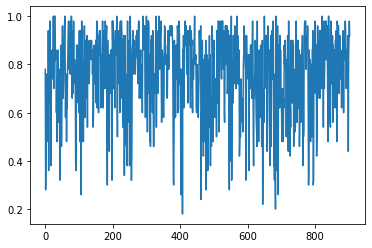

In [17]:
plt.plot(results)